# 感知机决策边界的求解

1. 读入数据文件 data_Perc.mat

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
mat = scipy.io.loadmat('.//data_Perc.mat')
Data = mat['x']
label = mat['y']
Data.shape,label.shape

((2, 15), (1, 15))

2. 构造增广矩阵 $ X = [\bf{1}\ X]$

In [2]:
X = np.c_[np.ones([15,1]),Data.T]
X

array([[ 1. ,  1. ,  4.5],
       [ 1. ,  1.5,  6.5],
       [ 1. ,  2.1,  3.5],
       [ 1. ,  3.1,  4.9],
       [ 1. ,  3.5,  6.5],
       [ 1. ,  4. ,  4.2],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  5.9,  2.7],
       [ 1. ,  6.9,  3.7],
       [ 1. ,  7.9,  2.2],
       [ 1. ,  8.4,  2.6],
       [ 1. ,  9. ,  1.6],
       [ 1. , 10. ,  5. ],
       [ 1. , 10.5,  0.8],
       [ 1. , 11.2,  1.5]])

3. 设置$w$的初值为$[0\ 0\ 0]^T$，并计算结果
    - 线性模型 $g(x) = w^Tx$, $w$ 和 $x$ 为增广的参数向量和数据矩阵 

In [3]:
w = np.zeros([3,1])

# 计算预测结果
result = X.dot(w).reshape(-1)
pred = 1*(result>0)
print(pred)
# label属于{-1,1},转成{0,1},方便后续编程
nlabel = (label+1)/2
print(nlabel)
pred != nlabel

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]]


array([[False,  True, False, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True]])

4. 梯度下降法求解$w$，直到没有错误分类为止,迭代次数不超过2000次
    - 目标函数 $ -\sum_{x_i \in M}  y_iw^Tx_i $
    - 梯度 $-\sum_{x_i \in M}  y_ix_i$

In [4]:
r = 0.01
t = 0
error = []
while np.sum(pred != nlabel) and t<2000:
    WX = X[np.array((pred != nlabel)).reshape(-1),:]
    Wlabel = label[0,np.array((pred != nlabel)).reshape(-1)]
    deltaw =  WX.T.dot(Wlabel.reshape(-1,1))
    wt = w + r* deltaw;
    error.append(-(WX.dot(w)/(np.linalg.norm(w)+np.spacing(1))).T.dot(label[0,np.array((pred != nlabel)).reshape(-1)].T))
    t= t+1
    pred = []
    w = wt
    result = X.dot(w).reshape(-1)
    pred = 1*(result>0)
print("the number of iteration is %d" %t)   

the number of iteration is 1225


5. 进行相关图形的绘制
    - subplot 用来绘制子图，212表示绘制的子图是2行1列的第二列，221表示2行2列的第一个，按c规则进行排列

Text(0.5, 1.0, 'Decision boundary of Perceptron')

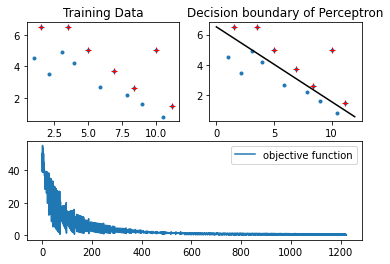

In [6]:
ax1 = plt.subplot(212)
ax1.plot(error[1:],label='objective function')
ax1.legend()

ax2 = plt.subplot(221) 
a = (label.reshape(-1)>0).nonzero()
a = np.array(a)
Dp = Data[:,a.reshape(-1)]
ax2.plot(Data[0,:],Data[1,:],'.')
ax2.plot(Dp[0,:],Dp[1,:],'r+')
ax2.set_title('Training Data')

ax3 = plt.subplot(222)
ax3.plot(Data[0,:],Data[1,:],'.')
ax3.plot(Dp[0,:],Dp[1,:],'r+')

p1 = 0
p2 = (-wt[1]*p1-wt[0])/wt[2]
q1 = 12
q2 = (-wt[1]*q1-wt[0])/wt[2]
ax3.plot([p1,q1],[p2,q2],'k-')
ax3.set_title('Decision boundary of Perceptron')
